In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv


In [5]:
def bad_line(x):
    print(x)
    return None

df = pd.read_csv("UpdatedResumeDataSet.csv",encoding='unicode_escape',on_bad_lines=bad_line,engine='python')

In [6]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills Ã¢ÂÂ¢ R Ã¢ÂÂ¢ Python Ã¢ÂÂ¢ SAP HANA ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [7]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

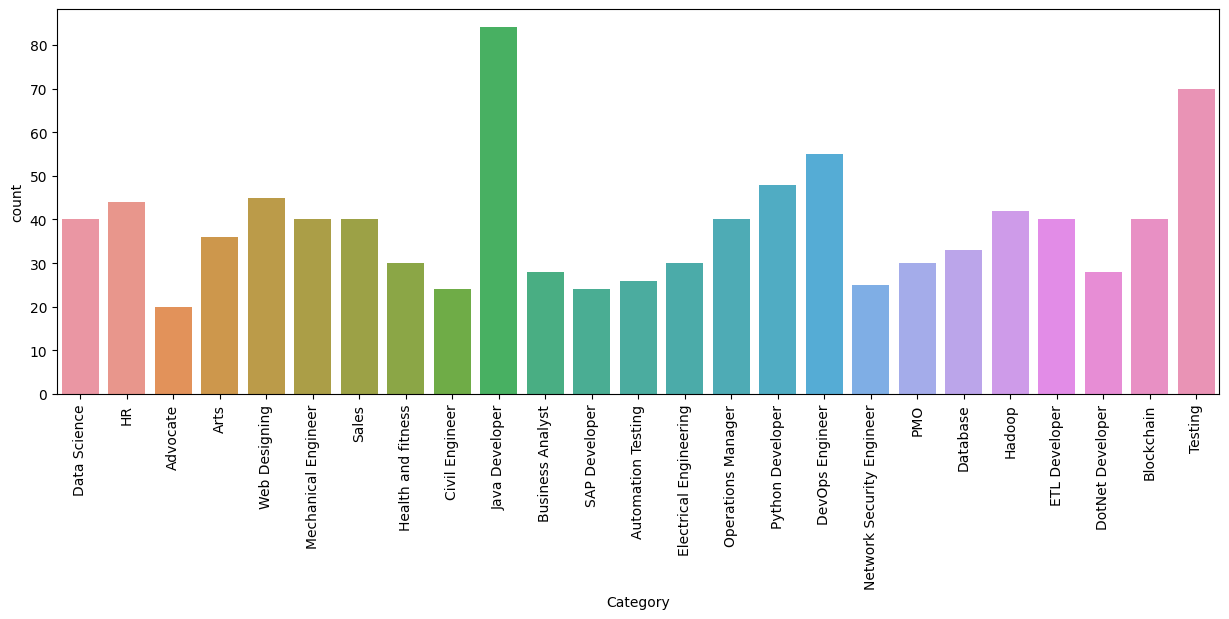

In [8]:
plt.figure(figsize=(15,5))
sns.countplot(df,x='Category')
plt.xticks(rotation=90)
plt.show()

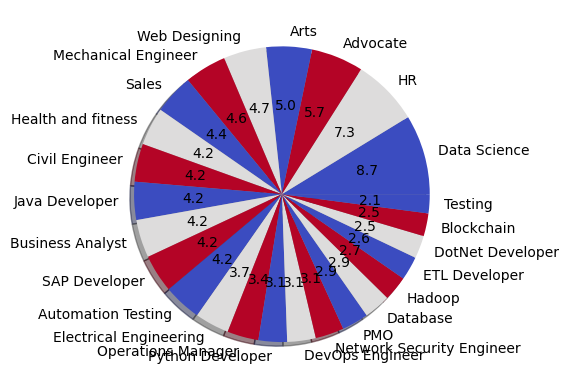

In [9]:
counts = df['Category'].value_counts()
labels=df['Category'].unique()
plt.pie(counts, labels=labels, autopct='%1.1f',shadow=True,colors=plt.cm.coolwarm(np.linspace(0,1,3)))
plt.show()

In [10]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ\x83Â¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investi

### **DATA CLEANING**

In [11]:
import re

def cleanresume(txt):
  cleantext=re.sub("http\S+\s"," ",txt)#remove urls
  cleantext=re.sub("#\S+\s"," ",cleantext)#hashtags
  cleantext=re.sub("@\S+"," ",cleantext)#remove mentions
  #punctuations and special characters
  cleantext=re.sub(r'[^\x00-\x7f]'," ",cleantext)
  cleantext=re.sub('\s+'," ",cleantext)
  cleantext=re.sub('RT|CC'," ",cleantext)
  cleantext=re.sub('[%s]'% re.escape("""!"#$%'><.,?/[/]@&*(/){|}\~`:;-+_'=""")," ",cleantext)
  return cleantext

In [12]:
df['Resume'] = df['Resume'].apply(lambda x:cleanresume(x))

In [13]:
df['Resume'][0]

'Skills   Programming Languages  Python  pandas  numpy  scipy  scikit learn  matplotlib   Sql  Java  JavaScript JQuery    Machine learning  Regression  SVM  Na ve Bayes  KNN  Random Forest  Decision Trees  Boosting techniques  Cluster Analysis  Word Embedding  Sentiment Analysis  Natural Language processing  Dimensionality reduction  Topic Modelling  LDA  NMF   PCA   Neural Nets    Database Visualizations  Mysql  SqlServer  Cassandra  Hbase  ElasticSearch D3 js  DC js  Plotly  kibana  matplotlib  ggplot  Tableau    Others  Regular Expression  HTML  CSS  Angular 6  Logstash  Kafka  Python Flask  Git  Docker  computer vision   Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate   Ernst   Young LLP Skill Details JAVASCRIPT  Exprience   24 months jQuery  Exprience   24 months Python  Exprience   24 monthsCompany Details company   Ernst   Young LLP description   Fraud Investigations and Dispute Services Assurance TEC

CONVERTING WORDS(categories) into categorical values

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [15]:
df['Category']=le.fit_transform(df['Category'])
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

VECTORIZATION

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(stop_words='english')

requiredText = tfidf.fit_transform(df['Resume'])

In [17]:
requiredText

<962x7339 sparse matrix of type '<class 'numpy.float64'>'
	with 164062 stored elements in Compressed Sparse Row format>

SPLITTING THE DATA AND TRAIN THE MODEL

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(requiredText,df['Category'],test_size=0.2,random_state=2)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf=OneVsRestClassifier(KNeighborsClassifier())
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9792746113989638


Prediction system

In [24]:
myresume="""Skills   Programming Languages  Python  pandas  numpy  scipy  scikit learn  matplotlib   Sql  Java  JavaScript JQuery    Machine learning  Regression  SVM  Na ve Bayes  KNN  Random Forest  Decision Trees  Boosting techniques  Cluster Analysis  Word Embedding  Sentiment Analysis  Natural Language processing  Dimensionality reduction  Topic Modelling  LDA  NMF   PCA   Neural Nets    Database Visualizations  Mysql  SqlServer  Cassandra  Hbase  ElasticSearch D3 js  DC js  Plotly  kibana  matplotlib  ggplot  Tableau    Others  Regular Expression  HTML  CSS  Angular 6  Logstash  Kafka  Python Flask  Git  Docker  computer vision   Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate   Ernst   Young LLP Skill Details JAVASCRIPT  Exprience   24 months jQuery  Exprience   24 months Python  Exprience   24 monthsCompany Details company   Ernst   Young LLP description   Fraud Investigations and Dispute Services Assurance TEC"""


In [23]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))

pickle.dump(clf,open('clf.pkl','wb'))

Actual model

In [27]:
#load trained classifier
clf=pickle.load(open('clf.pkl','rb'))
#clean i/p resume
cleaned_resume=cleanresume(myresume)

#transform cleaned features
input_features=tfidf.transform([cleaned_resume])
#Make predictions
prediction_id=clf.predict(input_features)[0]

#map category ID to category name
category_mapping={
    15:"Java Developer",
    23:"Testing",
    8:"Devops Engineer",
    20:"python Developer",
    24:"Web Designing",
    17:"Network security engineer",
    0:"Advocate",
    5:"Civil Engineer",
    21:"SAP Developer",
    12:"HR",
    13:"Hadoop",
    3:"Blockchain",
    10:"ETL Developer",
    18:"Operations Manager",
    6:"Data Science",
    22:"Sales",
    16:"Mechanical Engineer",
    1:"Arts",
    7:"Database Engineer",
    11:"Electical Engineer",
    14:"Health and Fitness",
    19:"PMO",
    4:"Business Analyst",
    9:"Dotnet Developer",
    2:"Automation Testing",
}

# print(prediction_id)
Category_name=category_mapping.get(prediction_id,"Unknown")
print("Prediction Category: ",Category_name)

Prediction Category:  Data Science
